# sklearn最近邻居分类器示例

下面是使用最近邻居分类器的简单示例。它将对每个类别进行边界划分。
Sample usage of Nearest Neighbors classification. It will plot the decision boundaries for each class.

## 数据集iris

iris数据集是机器学习任务中常用的分类实验数据集，由Fisher在1936收集整理。Iris中文名是安德森鸢尾花卉数据集，英文全称是Anderson’s Iris data set，是一类多重变量分析的数据集。

![鸢尾花](images/knn/鸢尾花图.jpg)

Iris一共包含150个样本，分为3类，每类50个数据，每个数据包含4个属性。可通过花萼长度，花萼宽度，花瓣长度，花瓣宽度4个属性预测鸢尾花卉属于（Setosa，Versicolour，Virginica）三个种类中的哪一类。

通俗地说，iris数据集是用来给莺尾花做分类的数据集，每个样本包含了花萼长度、花萼宽度、花瓣长度、花瓣宽度四个特征（下表中的前4列），我们需要建立一个分类器，该分类器可通过样本的四个特征来来判断样本属于山鸢尾（Setosa）、变色鸢尾（Versicolour）还是维吉尼亚鸢尾（Virginica）中的哪一个，即机器学习中的分类问题。

iris的每个样本都包含了品种信息，即目标属性（第5列，也叫target或label）。

![iris数据集概览](images\04\iris数据集.png)

将样本中的4个特征两两组合（任选2个特征分别作为横轴和纵轴，用不同的颜色标记不同品种的花），可以构建12种组合（其实只有6种，另外6种与之对称），如图所示：

![iris数据集概览](images\04\iris数据集的12种组合.png)

机器学习库scikit已经内置了iris数据集,引用方法如下：
```
from sklearn import neighbors,datasets

iris = datasets.load_iris()
```

## 分类器中的超参

超参数为:

- n_neighbors ：设定分类时所依据的邻居的个数
- weight ：距离的权重，可取两种值：uniform、distance
  + uniform：一致的权重（即均匀分布，各样本权重相同）；
  + distance：距离的倒数作为权重。
- p：设定闵可夫斯基距离的p值（只有当weight=distance的时候，p值才有意义）。
  + p=1:即欧式距离；
  + p=2:即曼哈顿距离；
  + p取1-6测试

> 注：所谓超参数（hyperparameter），在机器学习的上下文中，超参数是在开始学习过程之前设置值的参数，而不是通过训练得到的参数数据。通常情况下，需要对超参数进行优化，给学习机选择一组最优超参数，以提高学习的性能和效果。

## sklearn库中的kNN模型使用示例


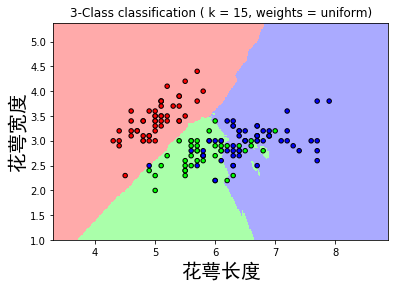

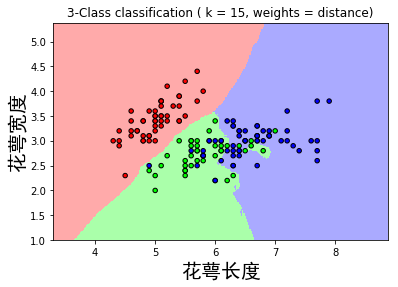

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors,datasets
# 设置显示中文
from matplotlib.font_manager import FontProperties 
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)

n_neighbors = 15

# 导入一些数据
iris = datasets.load_iris()

# 本例中，我们仅考虑最前面的两个features（花萼长度、花萼宽度）
# 我们将使用2维数据集来避免不好的切片
X = iris.data[:,:2] 
y = iris.target  

# 设置在mesh中的步长
h = .02 
# 生成彩色maps
cmap_light = ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000','#00FF00','#0000FF'])

for weights in ['uniform','distance']:
    #生成一个邻居分类器实例，并训练数据（拟合数据）
    clf = neighbors.KNeighborsClassifier(n_neighbors,weights=weights)
    clf.fit(X,y)
    
    # 对决策边界绘制散点图。为此，我们将对网格（the mesh [x_min, x_max]x[y_min, y_max]）中的每个点指定一个颜色
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    # 预测结果
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) #ravel()是数组扁平化操作，即使原多维数组变为1维，然后np.c_是将
                                                #np.c_是按行连接两个矩阵，就是把两矩阵左右相加，要求行数相等
    # 将结果也汇入到彩色散点图里
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx,yy,Z,cmap = cmap_light)
    
    # 将训练集中点也画入散点图
    plt.scatter(X[:,0],X[:,1],c=y,cmap = cmap_bold,edgecolor = 'k',s=20)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    plt.xlabel("花萼长度",fontproperties='SimHei',fontsize=20 )
    plt.ylabel("花萼宽度", fontproperties='SimHei',fontsize=20) 
    plt.title("3-Class classification ( k = %i, weights = %s)" % (n_neighbors,weights))
    
plt.show()

In [14]:
import numpy as np

a = np.arange(12).reshape(3,4)
b = np.arange(16).reshape(4,4)

print(a)
print(b)

print(a.ravel())
print(b.ravel())

c = np.array([1,2,3])
d = np.array([4,5,6])
print('-'*10)
print(c)
print(d)
print(np.c_[c,d])

#print(np.c_[a,b])
print('-'*10)

e = np.arange(12,24).reshape(3,4)
print(a)
print(e)
print(np.c_[a,e])
#np.r_是按列连接两个矩阵，就是把两矩阵上下相加，要求列数相等，类似于pandas中的concat()。
#np.c_是按行连接两个矩阵，就是把两矩阵左右相加，要求行数相等，类似于pandas中的merge()。

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
----------
[1 2 3]
[4 5 6]
[[1 4]
 [2 5]
 [3 6]]
----------
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]
[[ 0  1  2  3 12 13 14 15]
 [ 4  5  6  7 16 17 18 19]
 [ 8  9 10 11 20 21 22 23]]
